Q1. Explain GET and POST methods.

GET : 
GET is an HTTP method used to retrieve or fetch data from the server. In a GET request, the data is sent in the URL query string, which is a part of the URL after the question mark (?). The query string consists of a series of key-value pairs separated by an ampersand (&) symbol. The key-value pairs are used to pass parameters to the server, which can be used to filter or sort the data that is returned.

POST:
POST is an HTTP method used to submit data to a server. In a POST request, the data is sent in the request body, which is a part of the HTTP request after the headers. The data can be in various formats such as form data, JSON, XML, or plain text. The POST method is commonly used to submit data to a server, such as when submitting a form or uploading a file.

Q2. Why is request used in Flask?

In Flask, the request object is used to access incoming request data, such as form data, URL parameters, and HTTP headers. 
The request object is essential for processing user input and making decisions based on the user's requests. For example, a Flask application may need to access the form data submitted by the user to validate and process the data. 

Q3. Why is redirect() used in Flask?

In Flask, the redirect() function is used to redirect the user to a different URL. This function is useful when a Flask application needs to perform a specific action or show a specific page based on the user's input.

Q4. What are templates in Flask? Why is the render_template() function used?

In Flask, templates are used to separate the presentation logic from the application logic. A template is a file that contains HTML, CSS, and other markup that defines the look and feel of a web page.

The render_template() function is used in Flask to render a template and return the resulting HTML to the user's browser. This function takes the name of a template file and any context data that should be passed to the template.

In [2]:
pip install flask

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 8.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Q5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook.

import os, json
from flask import Flask, jsonify

app = Flask(__name__)


@app.route('/')
def index():
    return "Welcome to my Flask Api Assignment"


@app.route('/users', methods = ['GET'])
def get_all_users():
    with open('making_api_for_assignment/data.json', 'r') as f:
        data = json.load(f)
    users = data['users']
    return jsonify(users)

@app.route('/users/<int:user_id>', methods = ['GET'])
def get_user(user_id):
    with open('making_api_for_assignment/data.json', 'r') as f:
        data = json.load(f)
    users = data['users']
    user = next(filter(lambda user : user['id'] == user_id,users), None)
    if user is None:
        return jsonify({'message': 'User not found'}), 404
    return jsonify(user)

@app.route('/new', methods = ['GET','POST'])
def create():
    new_user = {
        "age": 21,
        "email": "sunny@example.com",
        "id": 4,
        "name": "Sunny"
    }
    with open('making_api_for_assignment/data.json', 'r') as f:
        data = json.load(f)
        data['users'].append(new_user)
    with open('making_api_for_assignment/data.json', 'w') as f:
        json.dump(data, f)
    return jsonify(new_user), 201

if __name__ == "__main__":
    app.run(host='0.0.0.0')

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.18.0.10:5000
Press CTRL+C to quit


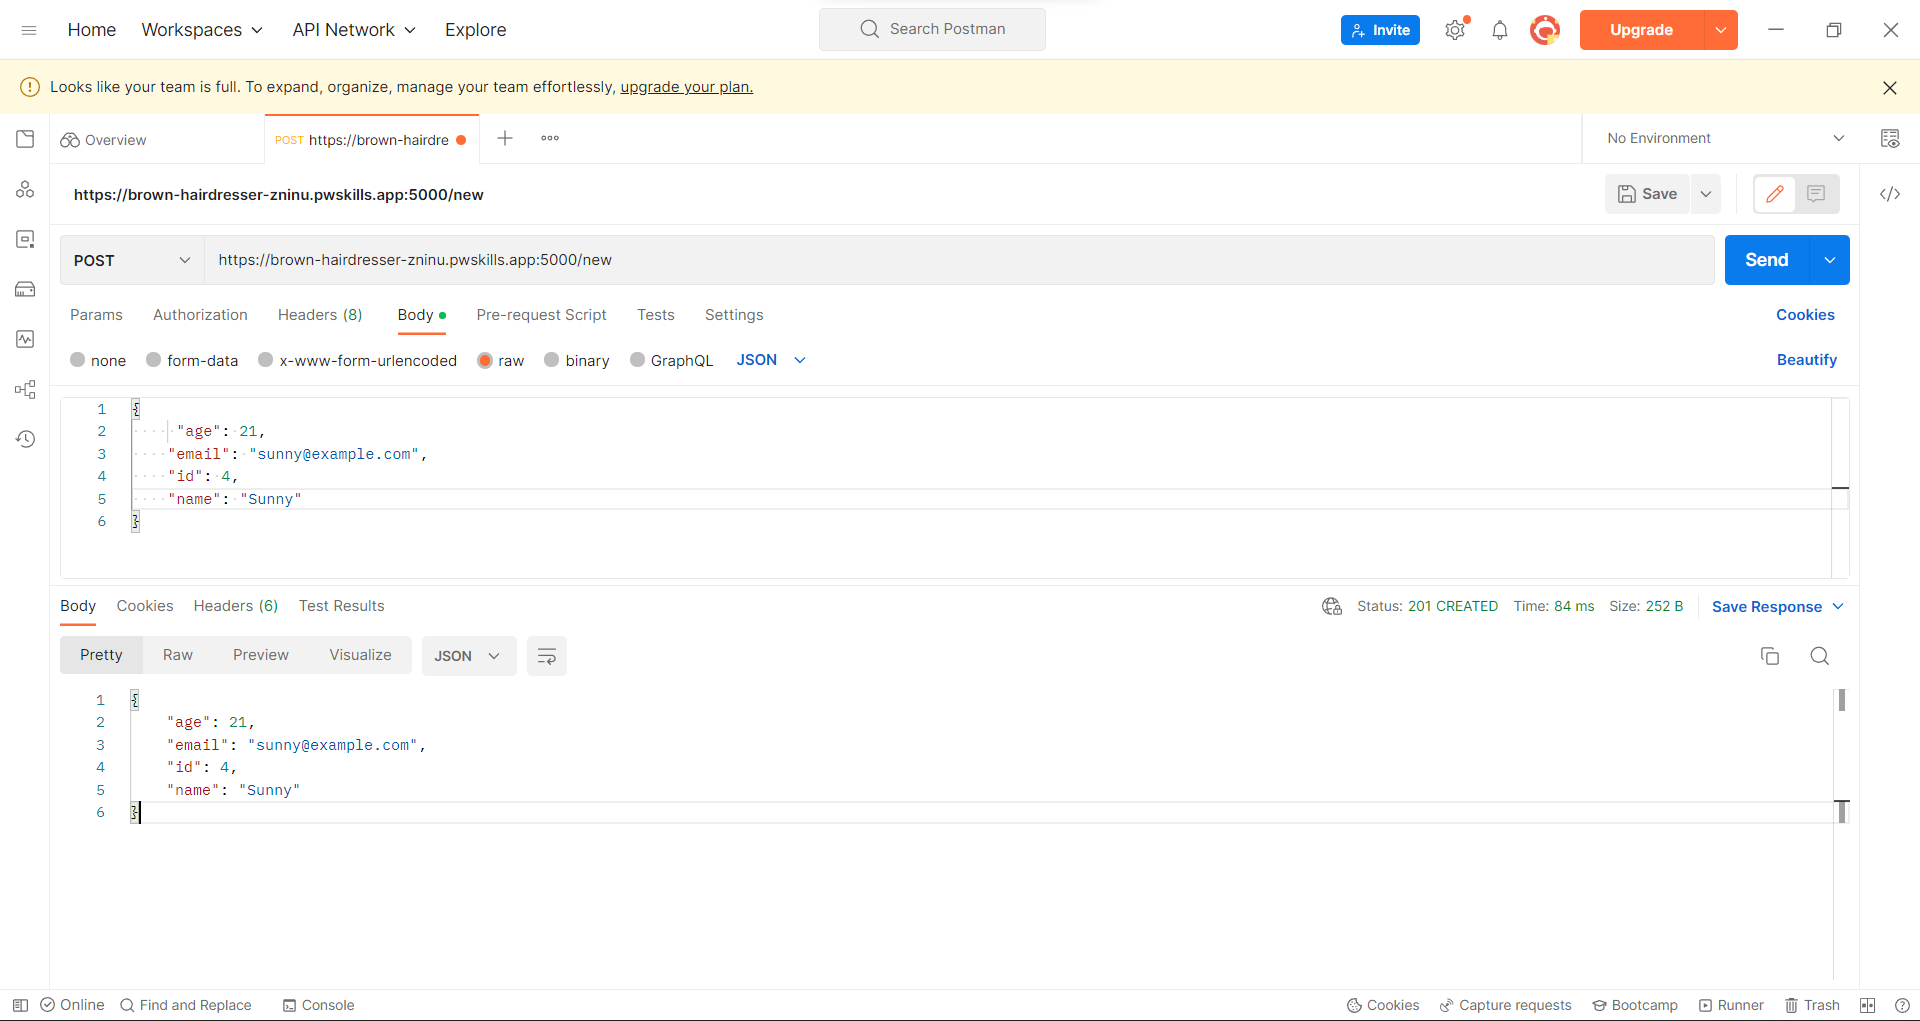

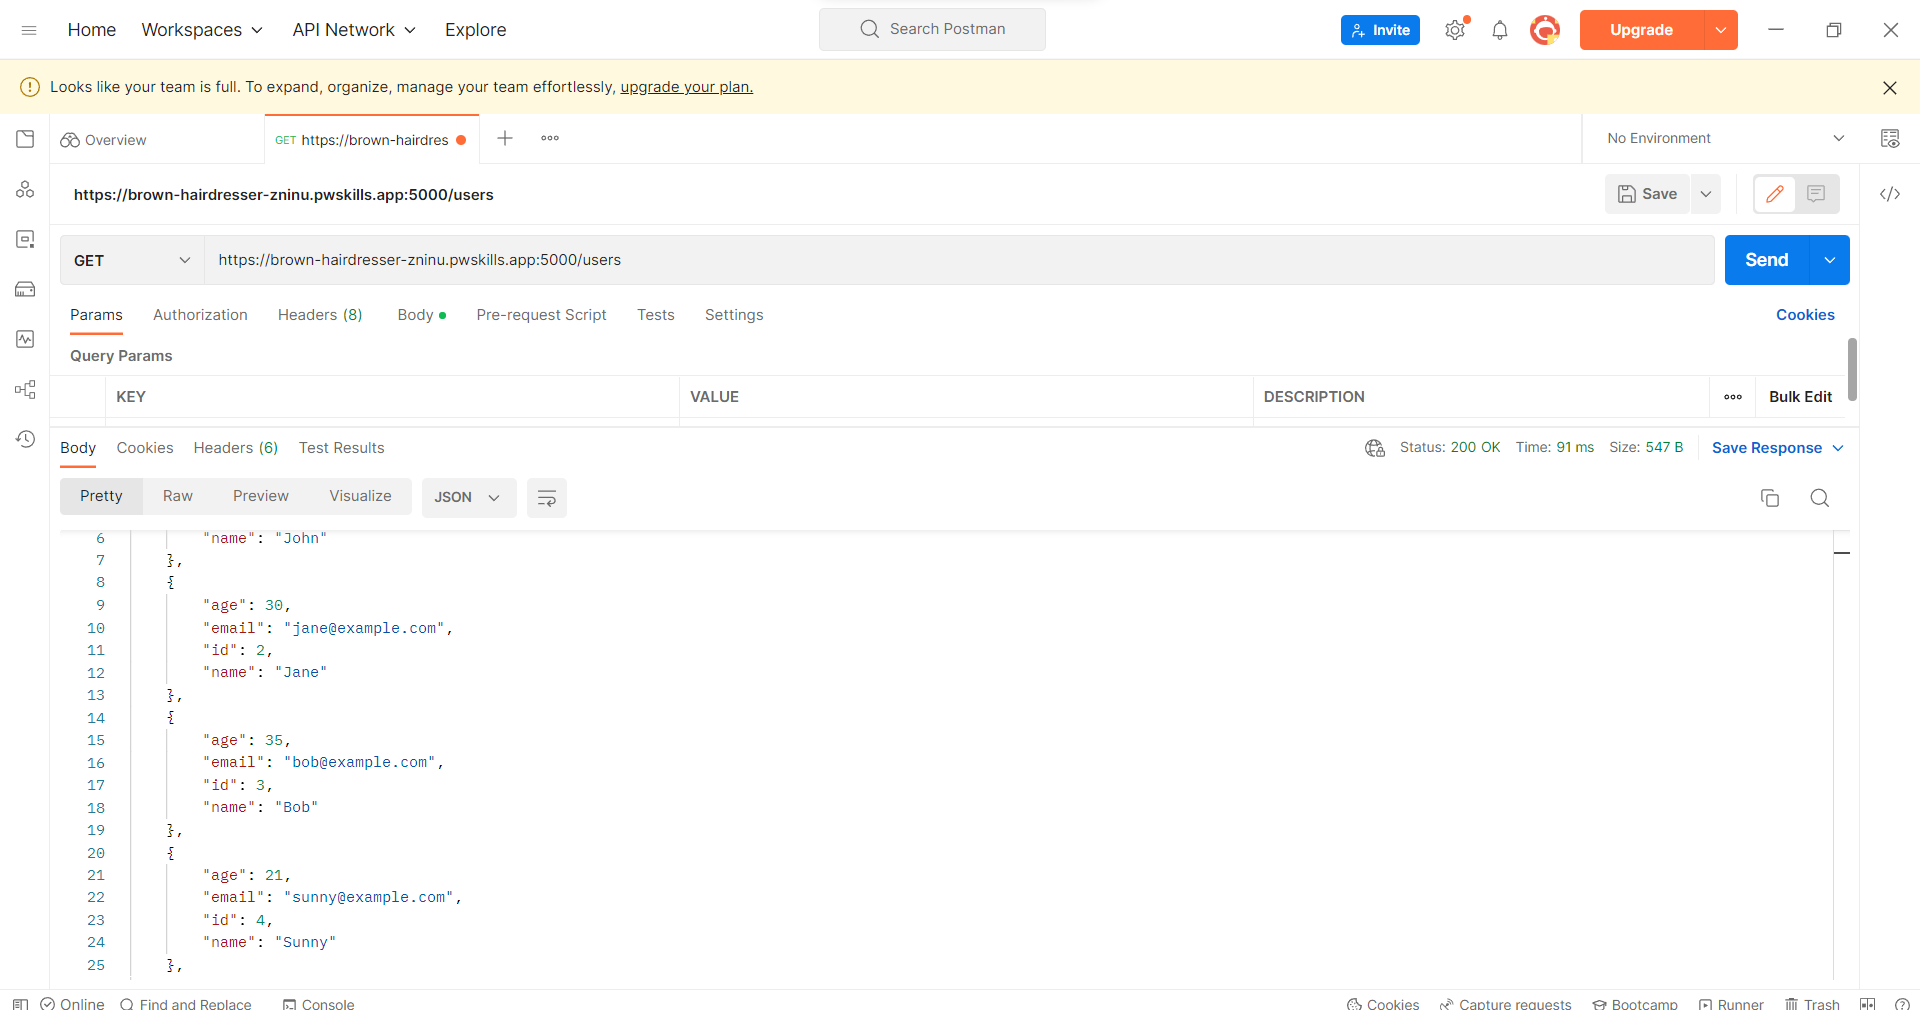